<a href="https://colab.research.google.com/github/Abhishek262/DA-project/blob/master/EDA_Visualisation/EDA_abhishek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhishek262","key":"f03ac5c0db1f2a506d2711e50d60e19f"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
 ! cp kaggle.json ~/.kaggle/
 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! mkdir traffic_dataset


In [ ]:
! kaggle datasets download -d silicon99/dft-accident-data


 99% 110M/112M [00:00<00:00, 106MB/s] 
100% 112M/112M [00:00<00:00, 128MB/s]


In [ ]:
! unzip dft-accident-data.zip -d traffic_dataset/


Archive:  dft-accident-data.zip
  inflating: traffic_dataset/Accidents0515.csv  
  inflating: traffic_dataset/Casualties0515.csv  
  inflating: traffic_dataset/Vehicles0515.csv  
  inflating: traffic_dataset/contextCSVs/Accident_Severity.csv  
  inflating: traffic_dataset/contextCSVs/Age_Band.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Class.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Severity.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Type.csv  
  inflating: traffic_dataset/contextCSVs/Day_of_Week.csv  
  inflating: traffic_dataset/contextCSVs/Journey_Purpose.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Control.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Detail.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Location.csv  
  inflating: traffic_dataset/contextCSVs/Light_Conditions.csv  
  inflating: traffic_dataset/contextCSVs/Local_Authority_District.csv  
  inflating: traffic_dataset/contextCSVs/Local_Authority_Highw

In [ ]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:


accidents = pd.read_csv('traffic_dataset/Accidents0515.csv',index_col='Accident_Index')
casualties=pd.read_csv('traffic_dataset/Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv('traffic_dataset/Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)


In [ ]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


In [ ]:
len(casualties.columns)

14

In [ ]:
print(len(accidents.index))
print(accidents["Speed_limit"].unique())

1760539
[30 40 50 20 60 70 10 15  0]


In [ ]:


accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
        #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)




Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

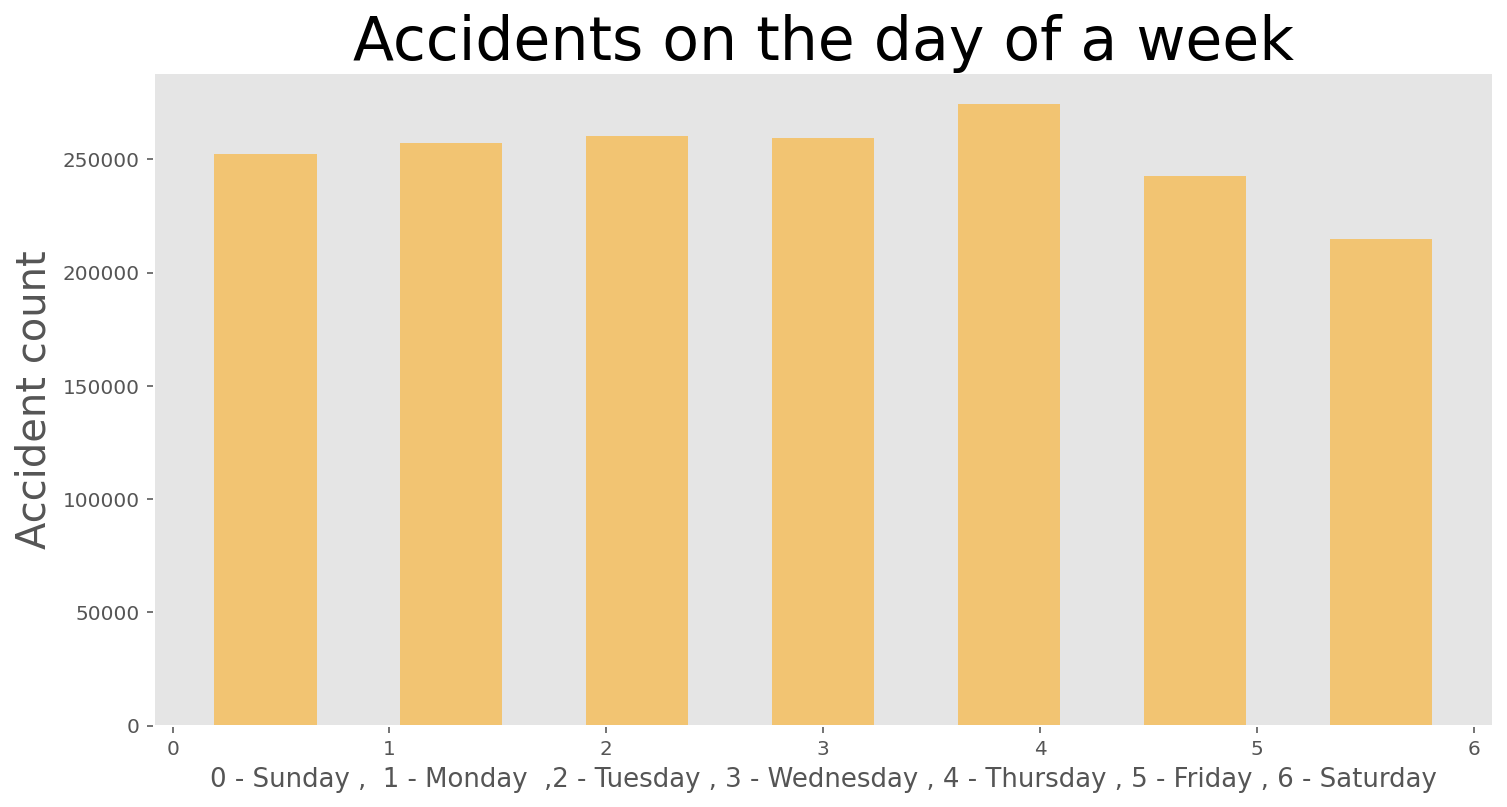

In [ ]:


plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)



Text(0, 0.5, 'Accident count')

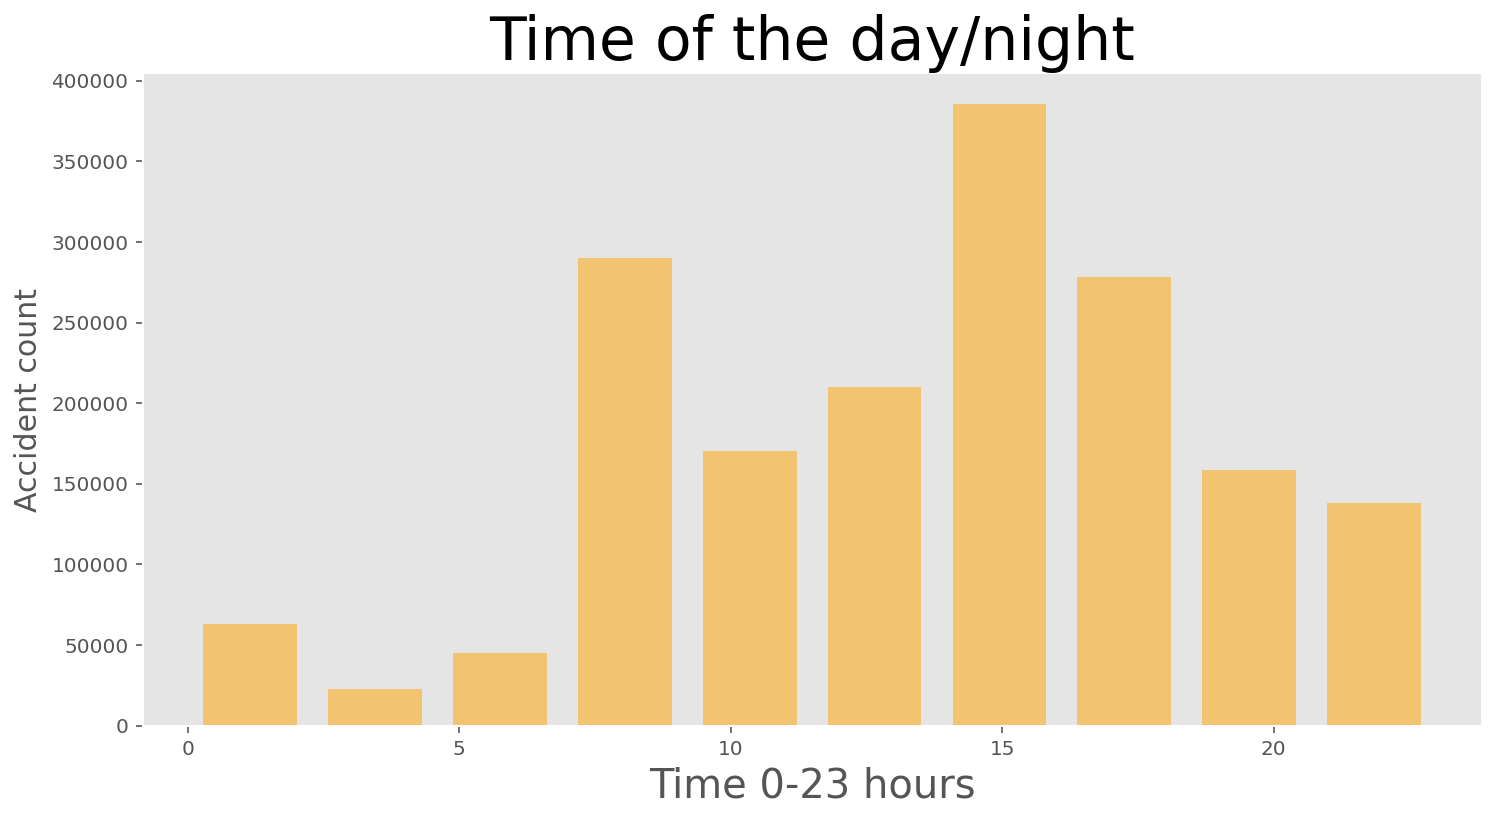

In [ ]:


plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)



Text(0.5, 0, 'Age of Drivers')

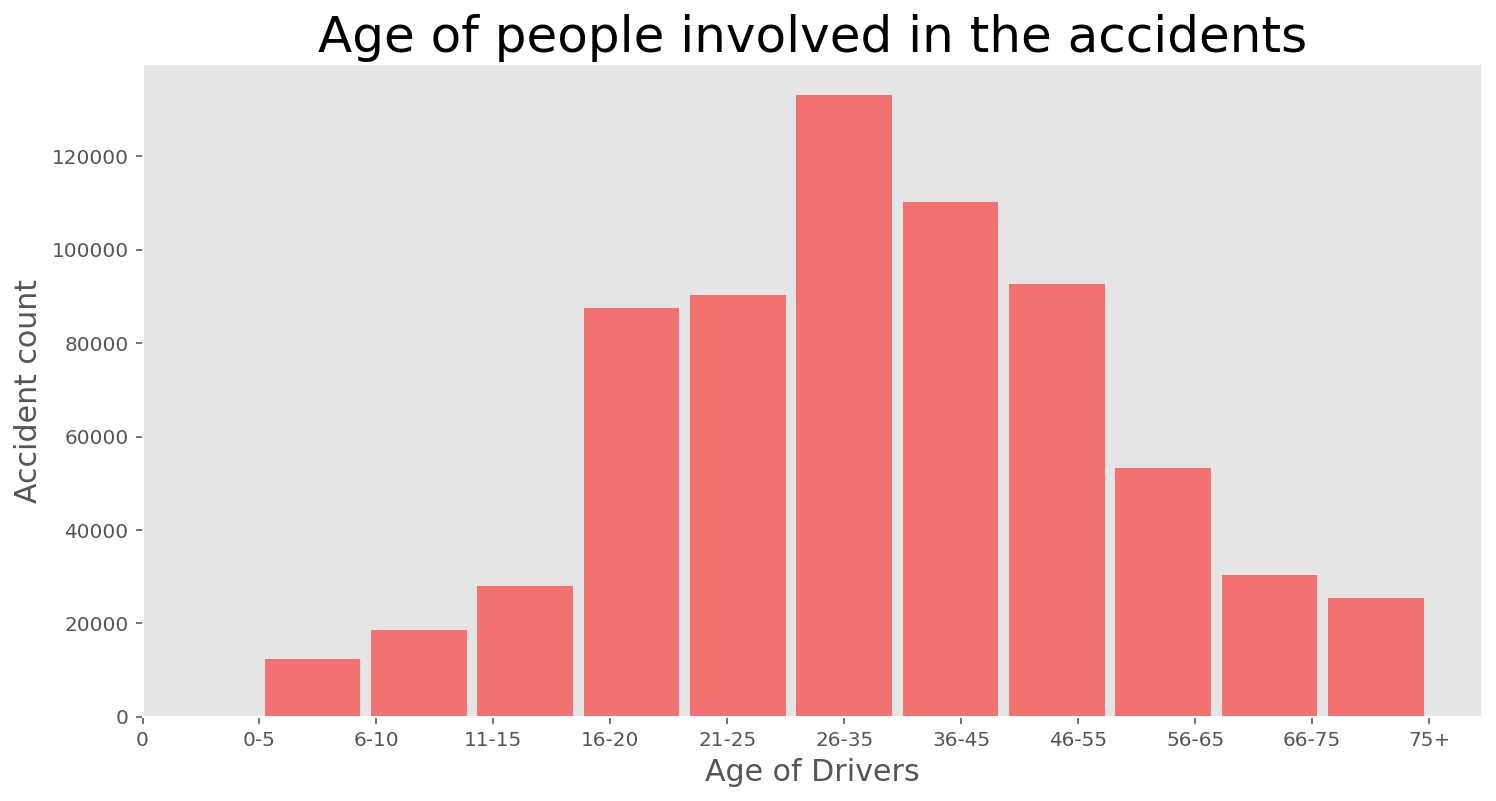

In [ ]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

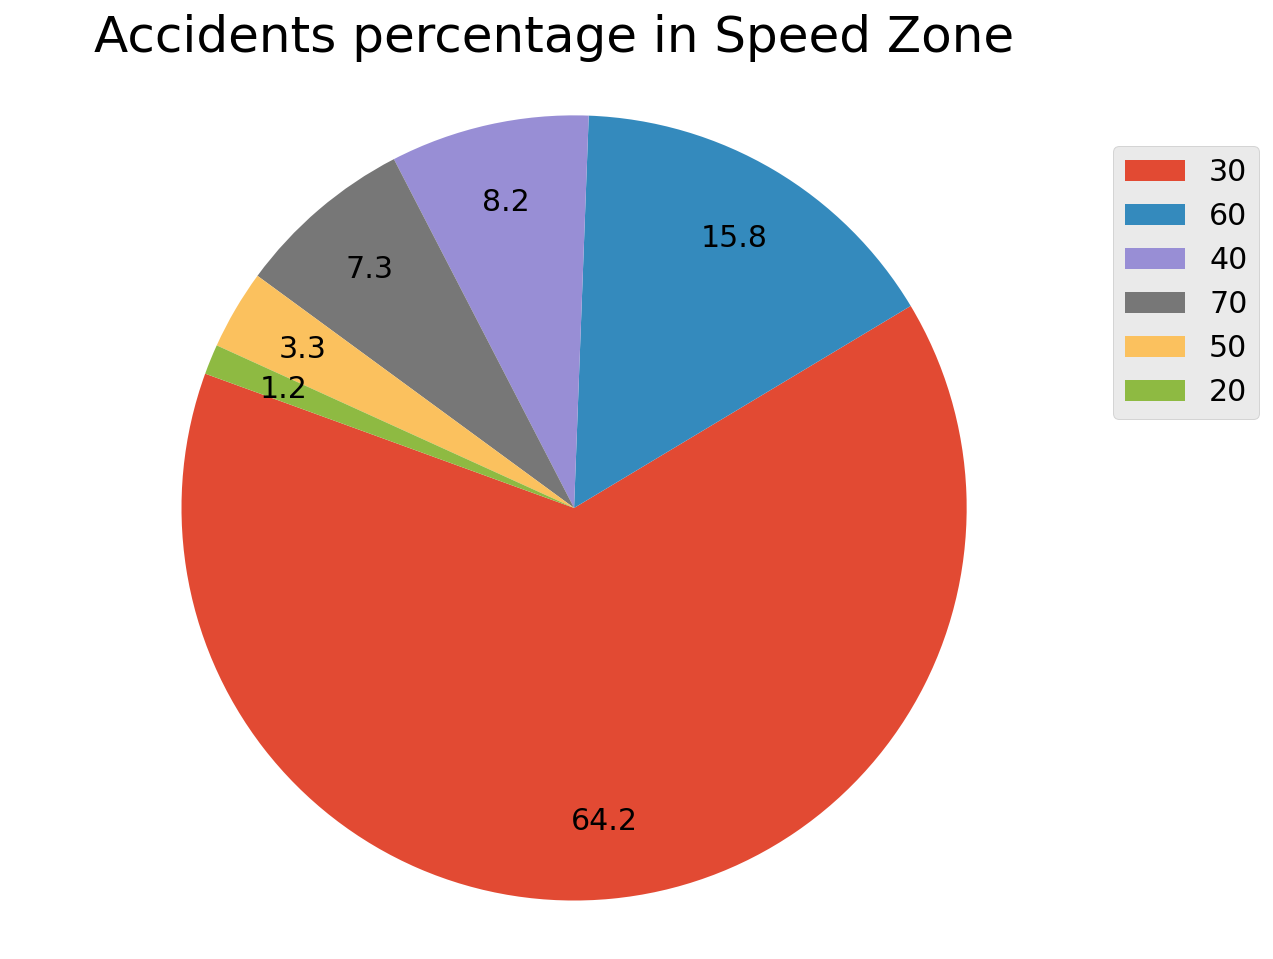

In [ ]:


speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
         
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
          bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()



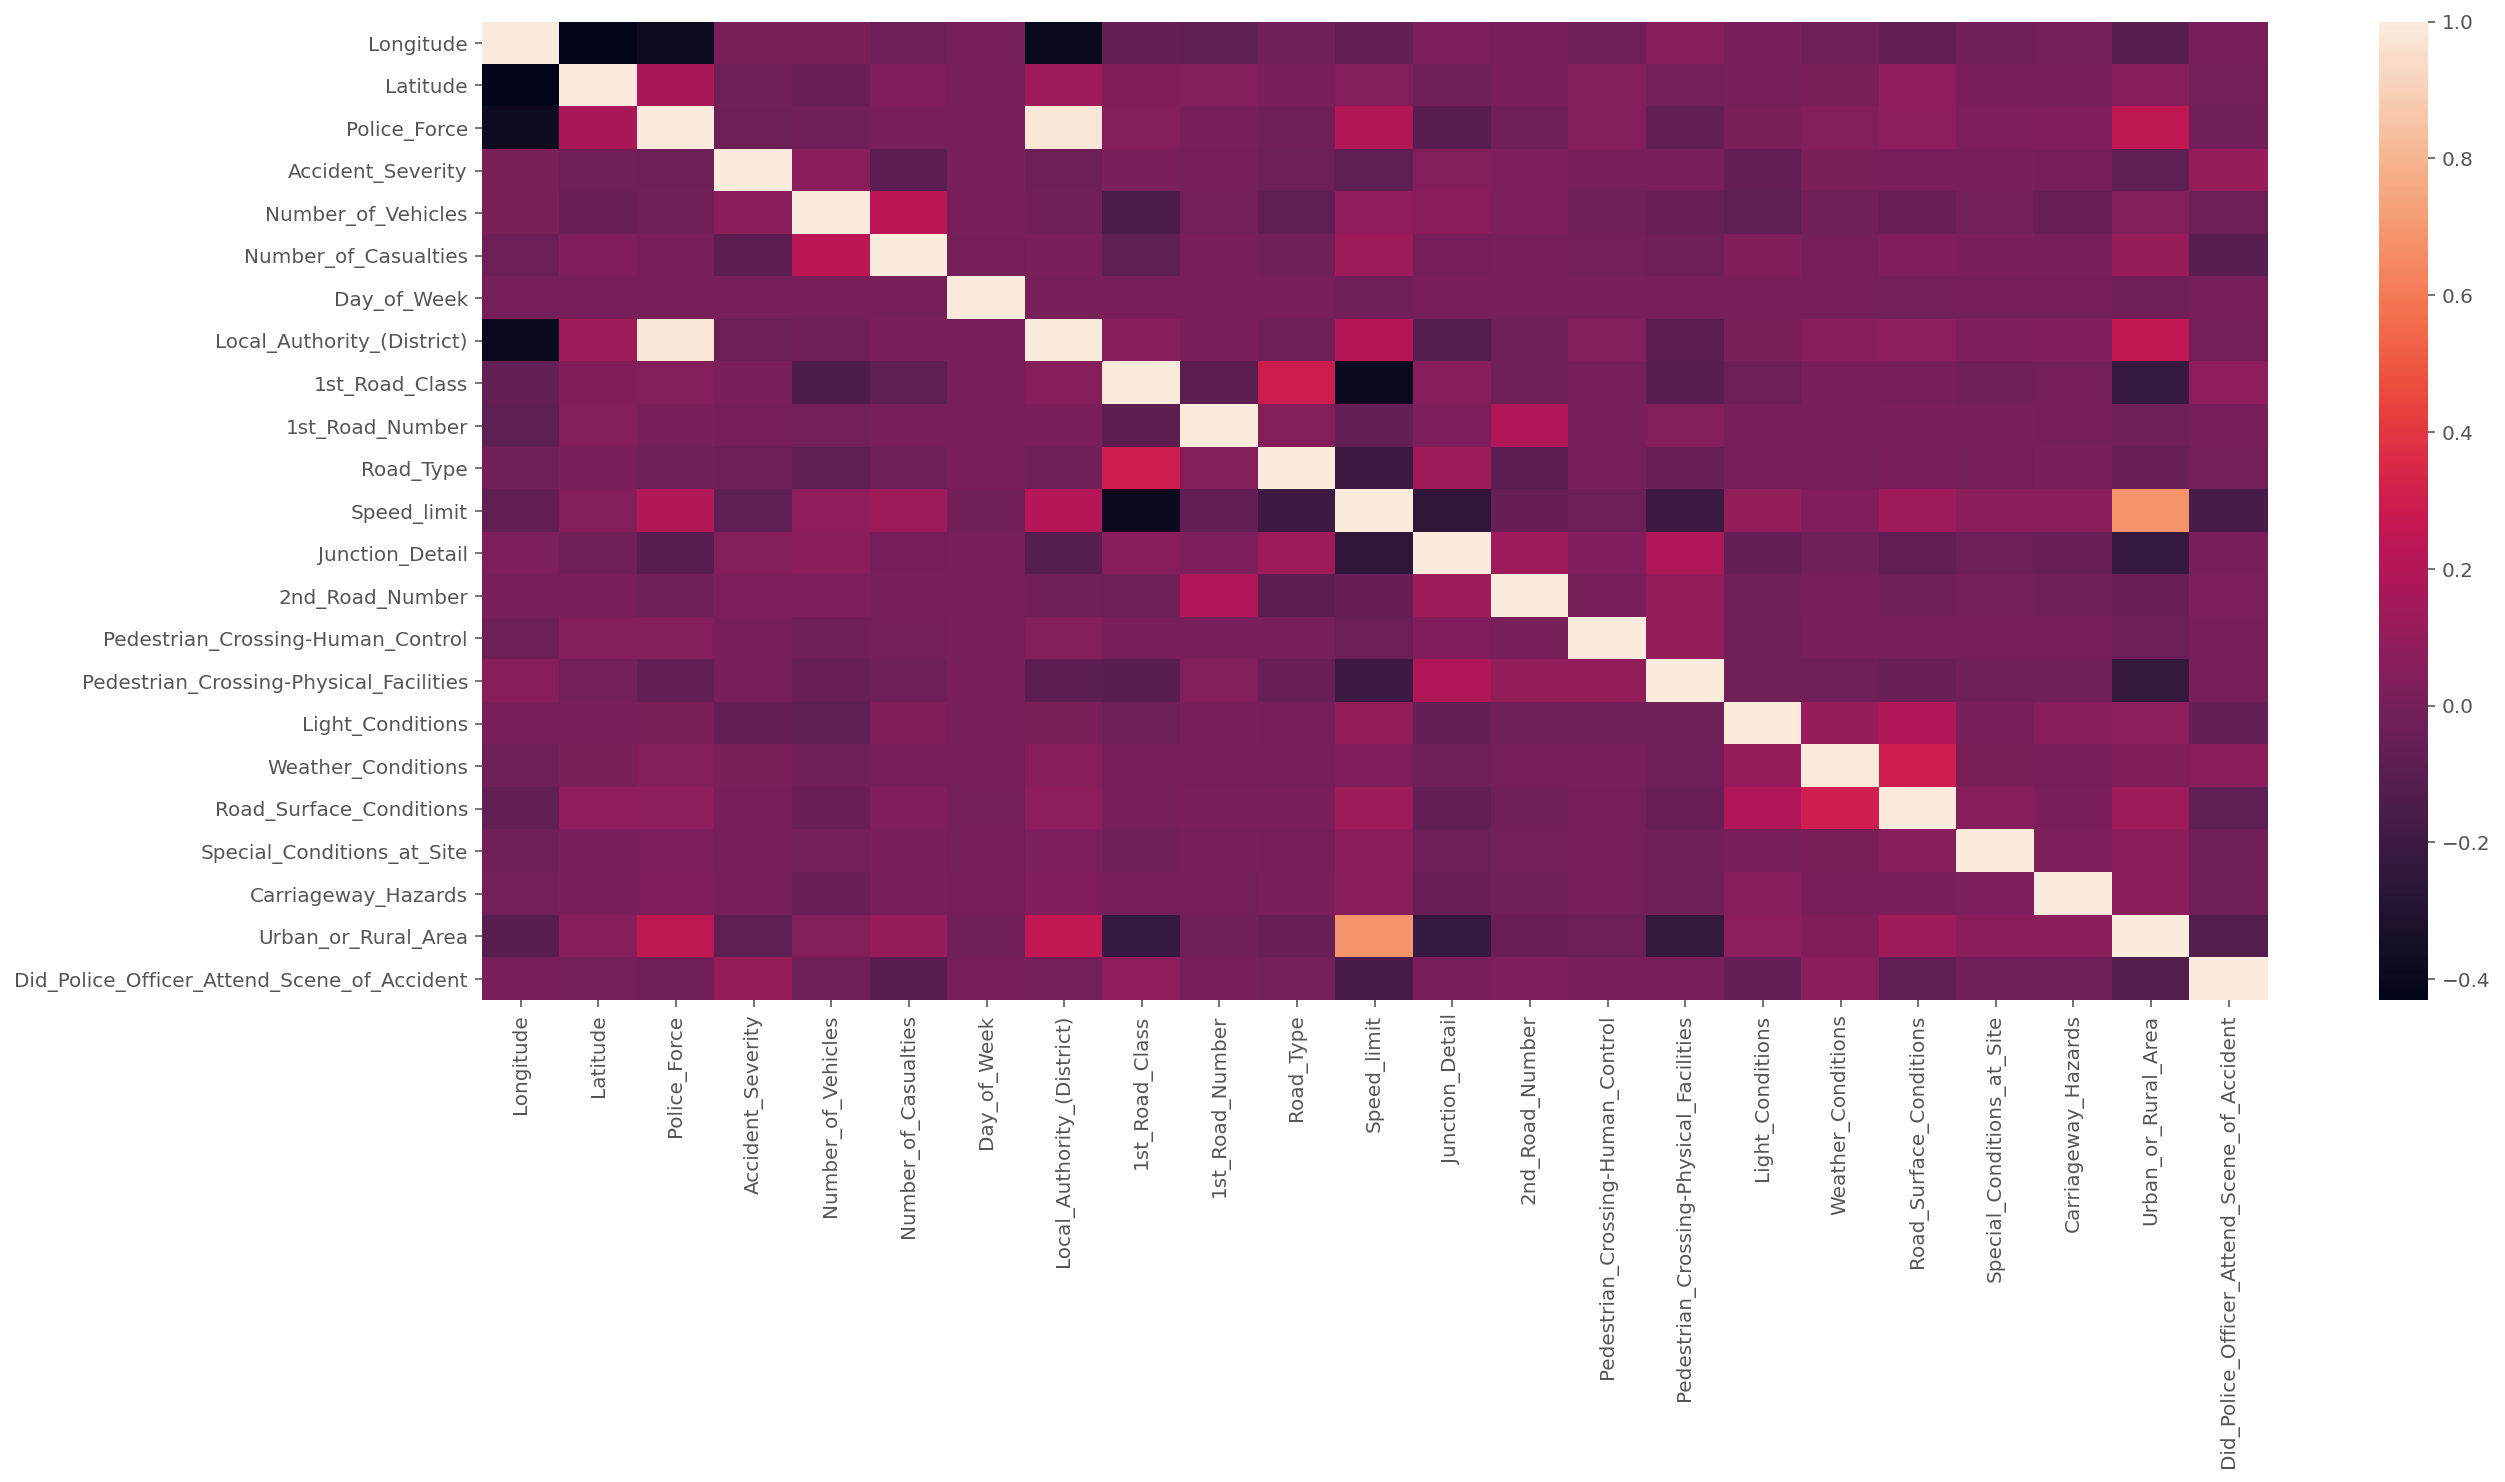

In [ ]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [ ]:
accidents["Accident_Severity"].unique()

array([2, 3, 1])

dict_keys([3, 2, 1])


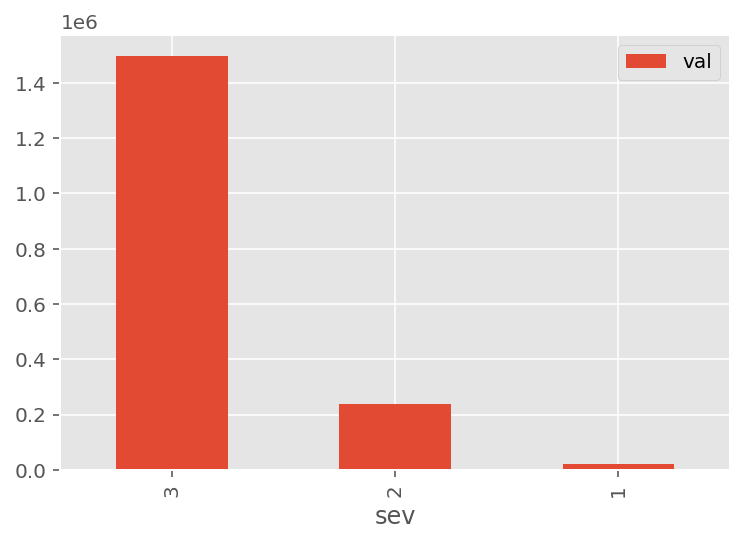

In [ ]:
# accidents["Road_Type"].unique()
y = dict(accidents["Accident_Severity"].value_counts())
xx = y.keys()
print(xx)
yy = y.values() 
df_accident_severity_sum = pd.DataFrame({'sev':list(xx),'val':list(yy)})
# print(df_accident_severity_sum)
df_accident_severity_sum.plot.bar(x = 'sev',y = 'val')

dict_keys([30, 60, 40, 70, 50, 20, 10, 15, 0])


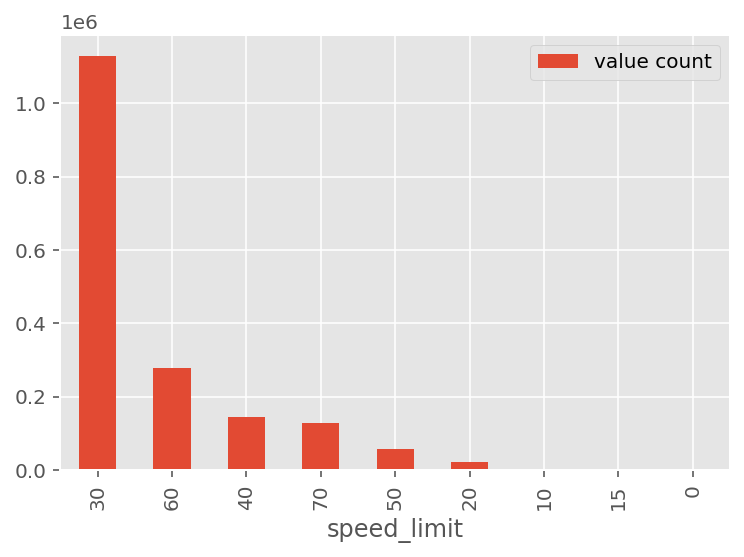

In [ ]:
# accidents["Road_Type"].unique()
y = dict(accidents["Speed_limit"].value_counts())
xx = y.keys()
print(xx)
yy = y.values() 
df_accident_severity_sum = pd.DataFrame({'speed_limit':list(xx),'value count':list(yy)})
# print(df_accident_severity_sum)
df_accident_severity_sum.plot.bar(x = 'speed_limit',y = 'value count')

In [ ]:
casualties["Casualty_Severity"].unique()

array([3, 2, 1])

dict_keys([19, 18, 20, 21, 22, 23, 25, 24, 17, 26, 30, 27, 28, 29, 31, 32, 40, 33, 35, 42, 45, 43, 34, 41, 44, 39, 46, 38, 47, 48, 36, 50, 37, 16, 49, 51, 52, 53, 54, 55, 56, 57, 12, 60, 58, 15, 11, 59, 14, 13, 61, 62, 63, 64, 65, 10, 66, 9, 67, 8, 7, 68, 70, 6, 69, 5, 4, 75, 71, 72, 73, 3, 74, 76, 77, 80, 79, 78, 2, 81, 82, 83, 1, 84, 85, 86, 87, 88, 89, 90, 0, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 101, 103])


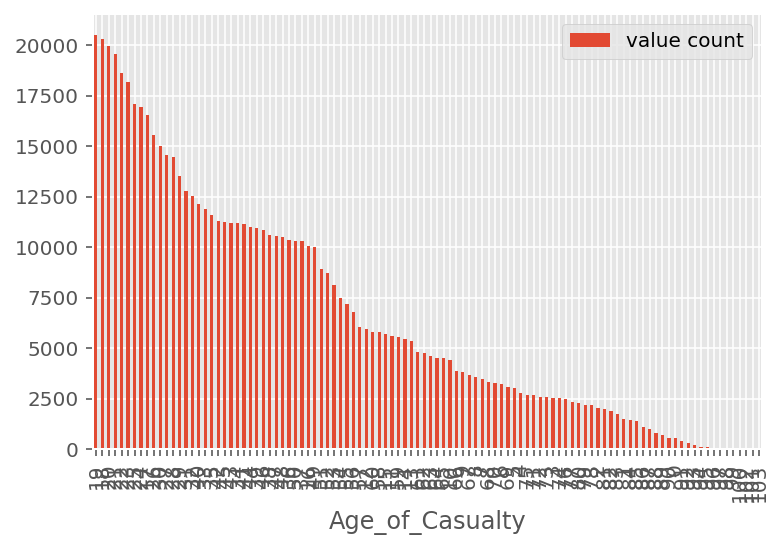

In [ ]:
# accidents["Road_Type"].unique()
y = dict(casualties["Age_of_Casualty"].value_counts())
xx = y.keys()
print(xx)
yy = y.values() 
df_accident_severity_sum = pd.DataFrame({'Age_of_Casualty':list(xx),'value count':list(yy)})
# print(df_accident_severity_sum)
df_accident_severity_sum.plot.bar(x = 'Age_of_Casualty',y = 'value count')  

In [ ]:
casualties.columns

Index(['Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [ ]:
casualties["Age_of_Casualty"].unique()

array([ 25,  30,  48,  56,  20,   4,  51,  50,  55,  35,  68,   5,  21,
        34,  36,  37,  43,  52,  26,  67,  40,  24,  38,  22,  65,  53,
        23,  47,  31,  27,  46,  66,  54,  29,  18,  42,  41,  49,  57,
        16,  11,  32,  28,   7,  39,  14,  17,  45,  70,  13,  80,   3,
         6,  59,  44,  64,  84,  15,  72,  33,  87,   8,  10,  88,  90,
        79,  76,  58,  69,  19,  63,  71,  77,  91,  89,  60,  12,  61,
        81,   0,  85,   2,  74,  75,  62,  73,  78,  82,   9,  86,  95,
        83,   1,  93,  97,  92,  96,  94,  99,  98, 103, 100, 101, 102])